In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import AntPath
import urllib.request
from PIL import Image

In [3]:
listings=pd.read_csv('./listings.csv')
listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,76,1,349,2020-08-23,4.82,1,272
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.36,1,365


In [32]:
!pip install folium

     |████████████████████████████████| 93 kB 915 kB/s eta 0:00:011


In [4]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
listings.isnull().sum()

id                                    0
name                                 18
host_id                               0
host_name                            14
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10633
reviews_per_month                 10633
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
listings.fillna({'reviews_per_month':0}, inplace=True)

In [7]:
listings.reviews_per_month.isnull().sum()

0

In [8]:

listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,76,1,349,2020-08-23,4.82,1,272
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.36,1,365


In [9]:
listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [10]:
listings.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
price=listings.price.max()
price

10000

In [12]:
#I wanted to see which borough has more lisitngs in arbnb
borough=listings.neighbourhood_group.value_counts()
borough

Manhattan        20236
Brooklyn         18263
Queens            5746
Bronx             1185
Staten Island      326
Name: neighbourhood_group, dtype: int64

In [13]:
# lets figur out the average price in each boroug
mean_price = listings.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
mean_price

neighbourhood_group
Manhattan        193.050603
Brooklyn         121.079943
Staten Island    113.202454
Queens           100.709189
Bronx             92.586498
Name: price, dtype: float64

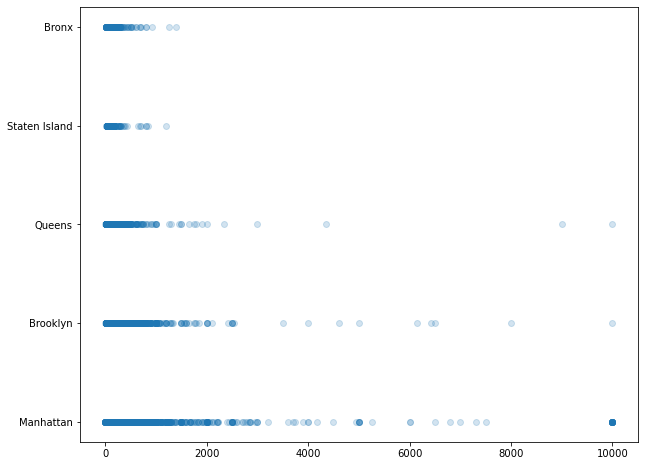

In [14]:
plt.figure(figsize=(10,8))
x=listings['price']
y=listings['neighbourhood_group']
plt.scatter(x, y, alpha=0.2)
plt.show()

In [15]:
#i breakdown the borough to watch the top listed area in NYC
top_area=listings.neighbourhood.value_counts().head(10)
top_area   # looks like  Williamsburg and B/S are the leaders

Williamsburg          3414
Bedford-Stuyvesant    3371
Harlem                2463
Bushwick              2169
Upper West Side       1832
Hell's Kitchen        1816
East Village          1675
Upper East Side       1636
Midtown               1629
Crown Heights         1425
Name: neighbourhood, dtype: int64

In [16]:
#setting figure size
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

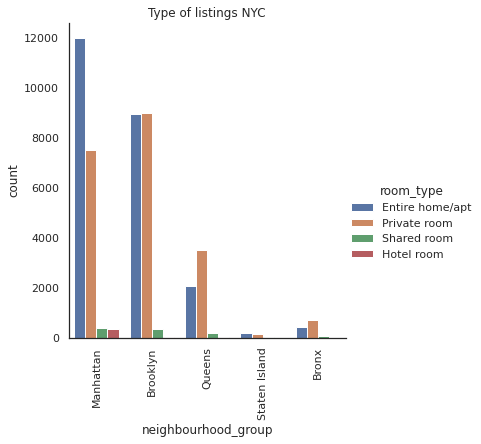

In [17]:
#WHICH TYPE OF LISTINGS ARE IN NYC

# sub_1=listings.loc[listings['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
#                  'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood_group', hue='room_type', data=listings, kind='count')
plt.title('Type of listings NYC')
viz_3.set_xticklabels(rotation=90)

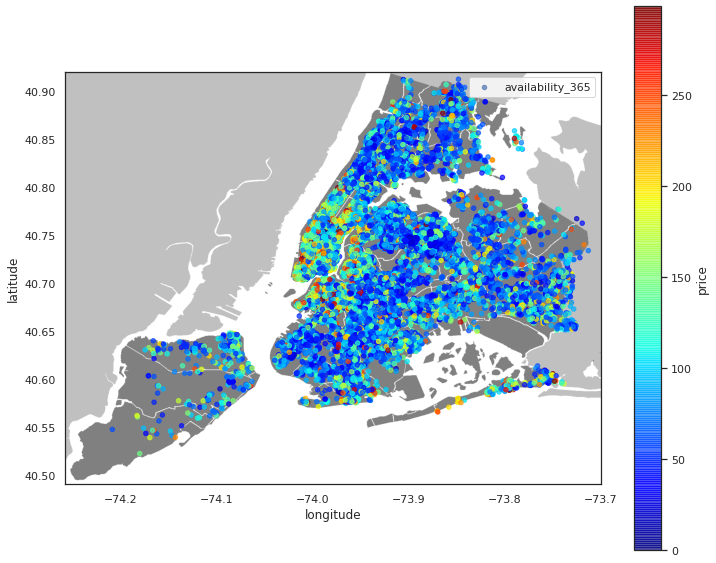

In [18]:
sub_2=listings[listings.price<300] 
nyc_img=Image.open('nyc.png')
plt.figure(figsize=(12,10))
# #scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub_2.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.7, zorder=5)

plt.legend()
plt.show()

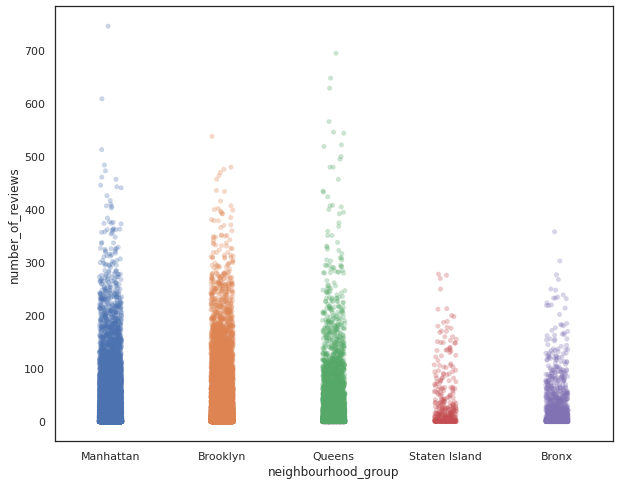

In [19]:
plt.figure(figsize=(10,8))
ax = sns.stripplot(x="neighbourhood_group", y="number_of_reviews", orient='v', data=listings, alpha=0.3)

In [20]:
priced=listings[listings['price'].isin([10000])]


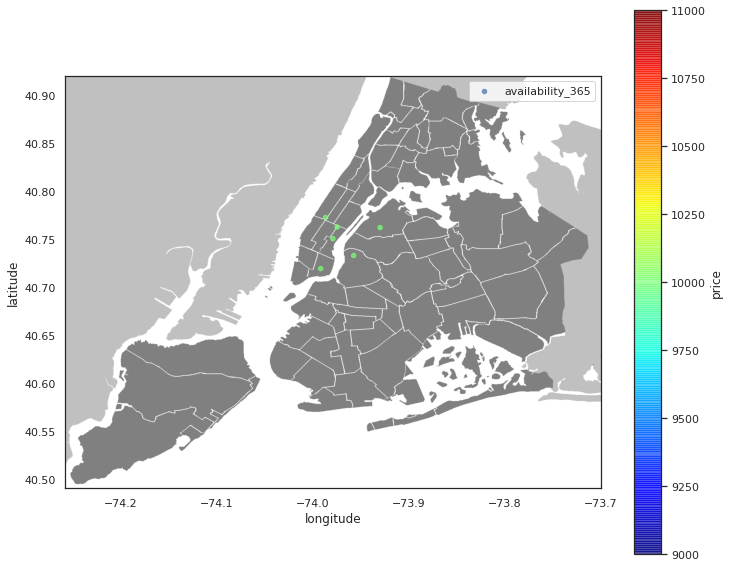

In [21]:
#lets see where  the $10000 per day listings are located
nyc_img=Image.open('nyc.png')
plt.figure(figsize=(12,10))
# #scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
priced.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.7, zorder=5)

plt.legend()

plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


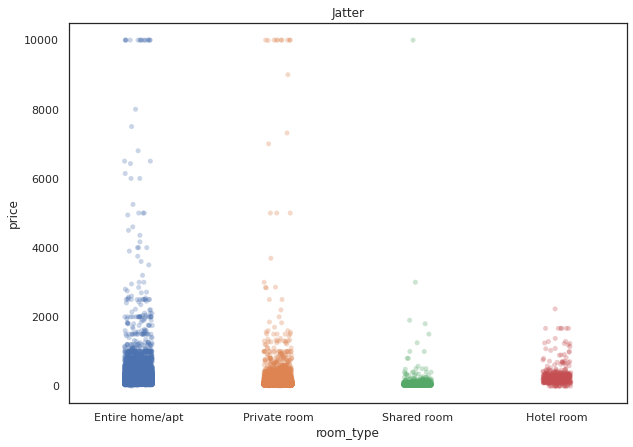

In [39]:
x=listings['room_type']
y=listings['price']
plt.figure(figsize = (10, 7))
ax = sns.stripplot(x, y, alpha=0.3)
ax.set_title("Jatter");